# 3 記述統計と単回帰分析

3章では、客観的にデータを分析し、データの傾向を明らかにする手法として、統計解析の基本について学びます。統計解析は「記述統計」と「推測統計」に大きく分かれますが、3章ではこのうち「記述統計」と、「推測統計」の1つである回帰を主に取り上げます。
解説で使うデータとして、カリフォルニア大学の学生の属性データをダウンロードし、2章で学んだPythonの色々なライブラリを使いながら学んでいきます。

ゴール：csvファイルのデータを読み込み、基礎的な統計量の算出と可視化、単回帰分析ができる

- **[3.1 統計解析の種類](#3.1-統計解析の種類)** 
    - [3.1.1 記述統計と推論統計](#3.1.1-記述統計と推論統計)
    - [3.1.2 この章で使うライブラリのインポート](#3.1.2-この章で使うライブラリのインポート)
<br><br>
- **[3.2 データの読み込みと対話](#3.2-データの読み込みと対話)**
    - [3.2.1 インターネットなどで配布されている対象データの読み込み](#3.2.1-インターネットなどで配布されている対象データの読み込み)
    - [3.2.2 データの読み込みと確認](#3.2.2-データの読み込みと確認)　
    - [3.2.3 データの性質を確認する](#3.2.3-データの性質を確認する)　
    - [3.2.4 量的データと質的データ](#3.2.4-量的データと質的データ)
<br><br>
- **[3.3 記述統計](#3.3-記述統計)**
    - [3.3.1 ヒストグラム](#3.3.1-ヒストグラム)
    - [3.3.2 平均、中央値、最頻値](#3.3.2-平均、中央値、最頻値)
    - [3.3.3 分散と標準偏差](#3.3.3-分散と標準偏差)
    - [3.3.4 要約統計量とパーセンタイル値](#3.3.4-要約統計量とパーセンタイル値)
    - [3.3.5 箱ひげ図](#3.3.5-箱ひげ図)
    - [3.3.6 変動係数](#3.3.6-変動係数)
    - [3.3.7 散布図と相関係数](#3.3.7-散布図と相関係数)
    - [3.3.8 すべての変数のヒストグラムゃ散布図を描く](#3.3.8-すべての変数のヒストグラムゃ散布図を描く)
<br><br>

- **[3.4 単回帰分析](#3.4-単回帰分析)**
    - [3.4.1 線形単回帰分析](#3.4.1-線形単回帰分析)
    - [3.4.2 決定係数](#3.4.2-決定係数)
<br><br>

- **[3.5 総合問題](#3.2-総合問題)**
    - [■総合問題3-1 統計の基礎と可視化](#■総合問題3-1-統計の基礎と可視化)
    - [■総合問題3-2 ローレンツ曲線とジニ係数](#■総合問題3-2-ローレンツ曲線とジニ係数)

***

## 3.1 統計解析の種類

キーワード：記述統計、推論統計、平均、標準偏差、単回帰分析、Numpy、Scipy、Pandas、Matplotlib、Scikit-learn

2章では、Pythonといくつかのライブラリについて、基本的な使い方を説明してきました。この章からは、それらを活用して、実際のデータと対話していきます。

### 3.1.1 記述統計と推論統計
統計解析は、データを客観的に分析し、そのデータに含まれる傾向を明らかにする方法です。その手法は、「記述統計」と「推測統計」に大きく分かれます。


**記述統計** 

記述統計は、集めたデータの特徴をつかんだり分かりやすく整理したり見やすくしたりする方法です。たとえば、平均や標準偏差などを計算してデータの特徴を計算したり、データを分類したり、図やグラフなどを用いて表現したりするのが記述統計です。この章で詳しく扱います。

**推論統計**

集めたデータから推論する方法です。たとえば、日本の全人口の年齢別の身長を調べたいとします。全員の身長を調べるのは困難です。そこでランダムに抽出した一部の人たちだけを対象に身長を調べ、そこから母集団である日本人の身長を推論します。このように、部分的なデータしかないものから確率分布に基づいたモデルを用いて精密な解析をし、全体を推論して統計を求めるのが、推論統計の考え方です。
推論統計は過去のデータから未来予測するときにも使われます。この章では、推論統計の基礎である単回帰分析について説明します。より複雑な推論統計については、次の章で扱います。

### 3.1.2 この章で使うライブラリのインポート

この章では、2章で紹介した各種ライブラリを使います。次のようにインポートしていることを前提として進めていきます。

In [2]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

また、「3.4　単回帰分析」では、Scikit-learnの線形回帰分析用のライブラリである`sklearn.linear_model`を使います。scikit-learnは、機械学習の基本的なライブラリです。「3.4」でも改めて説明しますが、次のようにインポートします。

In [3]:
from sklearn import linear_model

## 3.2 データの読み込みと対話
キーワード：ディレクトリ（フォルダ）操作、CSV、量的データ、質的データ、平均

データを解析するには、対象のデータをPythonで扱えるように読み込む必要があります。
データはCSV形式データやデータベースとして扱うのが一般的です。またインターネットには、研究用のデータが圧縮されたZIP形式で提供されているものもあります。
まずは、こうしたデータを読み込む方法から習得しましょう。

### 3.2.1 インターネットなどで配布されている対象データの読み込み

ここでは対象のデータが、ZIP形式ファイルとしてWebで公開されており、それをダウンロードして利用するという状況を想定します。ブラウザからあらかじめダウンロードしておくこともできますが、Pythonでは、直接読み込んでデータを保存することもできるため、本書では、Pythonのプログラムでダウンロードする方法を説明します。

#### カレントディレクトリの確認

まずは、ダウンロードするファイルを置くディレクトリ（フォルダ）を準備します。Jupyter環境で「`pwd`」と入力して実行すると、現在、どこのディレクトリが操作対象になっているのかを確認できます。操作対象となっているディレクトリのことをカレントディレクトリと言います（Jupyter環境ではなく、コマンドプロンプトやシェルなどでも、同じように操作対象のディレクトリをカレントディレクトリと言います）。

なお、表示されるディレクトリの名前は、環境によって異なります。すなわち、実行例は、ここで提示しているものと違うかも知れませんが、結果が表示されていれば問題ありません。

なお、「`pwd`」はPythonのプログラムではなく、シェルのコマンドです。Jupyter環境では、ひとつのセルに「`pwd`などのシェルのコマンド」と「Pythonのコマンド」を混ぜて書くことはできず、エラーとなるので注意してください。

In [4]:
pwd

'C:\\Users\\yanch\\OneDrive\\文件\\homework\\大數據分析與應用'

#### ディレクトリの作成と移動

確認したら、ここにダウンロードするディレクトリを作りましょう。Jupyter環境のセルに次のように入力して実行すると、上記で確認したディレクトリの下にchap3という名前のフォルダが作られます。


In [5]:
mkdir chap3

子目錄或檔案 chap3 已經存在。


ディレクトリを作成したら、そこに移動しましょう。セルに次のように`cd`コマンドを入力して実行することで、いま作成したchap3ディレクトリに移動できます。


In [6]:
cd ./chap3

C:\Users\yanch\OneDrive\文件\homework\大數據分析與應用\chap3


#### サンプルデータのダウンード

次に、このディレクトリにサンプルデータをダウンロードします。ここでは、カリフォルニア大学アーバイン校（UCI）が提供しているサンプルデータを利用します。
ここではファイルをPythonのプログラムでダウンロードすることにします。下記に示すコードを順にJupyter環境のセルに入力して順に実行すると、いま作成したchap3ディレクトリにダウンロードしたデータが保存されます。


#### ZIPファイルとファイルをダウンロードするためのライブラリ

まずは、ZIPファイルやファイルをダウンロードするためのライブラリをインポートします。ZIPファイルを読み込んだり、Webから直接ダウンロードしたりするには、次のように「`requests`」「`zipfile`」「`io`」の3つのライブラリを使います。

- `requests` … Webのデータを送受信します
- `zipfile` … ZIP形式ファイルを読み書きします
- `io` … ファイルを読み書きします

In [7]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
from io import StringIO
import io

#### ZIPファイルをダウンロードして展開する

ここで利用するファイルは、次のファイルです。ZIP形式でまとめられています。

http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip

このファイルをダウンロードして展開するには、次のPythonプログラムをJupyter環境のセルに入力して実行します。すると、現在のカレントディレクトリに展開されます。ここまでの操作では、カレントディレクトリをchap3に移動しているので、そのディレクトリに展開されるはずです。なお、LinuxやMacのターミナルを使われている方は、wgetコマンドでデータのダウンロードが可能です。


In [8]:
# データがあるurlの指定
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

Webからデータをダウンロードするには、`requests.get`を使います。このダウンロードしたデータを、`io.BytesIO`を使ってバイナリストリームとして`ZipFile`オブジェクトに与え、最後に`extractall()`を実行すると、ダウンロードしたZIP形式データを展開できます。
ダウンロードが終了したら、データがちゃんとダウンロードされ、展開されているかチェックしましょう。次のように`ls`コマンドを実行すると、カレントディレクトリのファイル一覧を表示できます。

In [9]:
ls

 磁碟區 C 中的磁碟沒有標籤。
 磁碟區序號:  2609-8BB5

 C:\Users\yanch\OneDrive\文件\homework\大數據分析與應用\chap3 的目錄

2022/03/23  下午 04:07    <DIR>          .
2022/03/25  下午 07:44    <DIR>          ..
2022/03/23  下午 04:07    <DIR>          chap3
2022/03/25  下午 09:17             3,206 student.txt
2022/03/25  下午 09:17            56,993 student-mat.csv
2022/03/25  下午 09:17               269 student-merge.R
2022/03/25  下午 09:17            93,220 student-por.csv
               4 個檔案         153,688 位元組
               3 個目錄  436,826,525,696 位元組可用


無事に展開されると、「student.txt」「student-mat.csv」「student-merge.R」「student-por.csv」という4つのファイルが配置されます。本書では、これらのデータのうち、「student-mat.csv」と「student-por.csv」の2つのデータを使います。


### 3.2.2 データの読み込みと確認

ダウンロードしたデータのうち、まずは、「student-mat.csv」が、どのようなデータであるのかを観察していきます（後の練習問題で「student-por.csv」と合わせたデータを扱います）。

####  データをDataFrameとして読み込む
まずは、対象のデータを読み取り、Pandasの`DataFrame`オブジェクトとして扱います。次のようにpd.read_csvの引数にファイル名student-mat.csvファイルを記載して実行すると、そのファイルが読み込まれ、`DataFrame`オブジェクトとなります。

In [10]:
student_data_math = pd.read_csv('student-mat.csv')

#### データを確認する

データを読み込んだら、実際のデータの中身を見てみましょう。`head`を使うと、データの先頭から一部をサンプルとして参照できます。括弧のなかに何も指定しない場合は先頭の5行が表示されますが、括弧のなかに行数を指定した場合は、指定した行数だけ表示されます。たとえば、`head(10)`とすれば、10行分表示されます。

In [11]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


#### カンマで区切ってデータを読む

データが入っているのはわかりますが、このままではデータが大変扱いにくいです。よくデータを見てみると、ダウンロードしたデータの区切り文字は「;」（セミコロン）となっています。ほとんどのCSV形式ファイルでは「,」（カンマ）がデータの区切り文字として使われるのが慣例なのですが、ダウンロードしたデータは「;」が区切りであるため、データの区切りを正しく識別できないので、このようにデータがつながってしまうのです。

区切り文字を変えるには、`read＿csv`のバラメータとして「`sep='区切り文字'`」を指定します。「;」を区切り文字にするため、次のようにして、データを再度読み込みましょう。

In [12]:
# データの読み込み
# 区切りに";"がついているので注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')

もう一度データを確認します。

In [13]:
# どんなデータがあるかざっと見る
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


データが正しく区切られました。

なお、read_csvの解説を見ると最初から「;」が設定されていることが多いのですが、まだ何も知らない見たこともないデータに対して、区切り文字を「;」にすればよいかどうかは、普通はわかりません。データ分析の実務では、試行錯誤をしながら区切り文字を探すことも多いので、今回は上記のような流れで実施してみました。

なお、このread_csvについては、sep以外にもパラメータがいくつかあり、区切り文字のほか、データ名（アドレス含む）、ヘッダーがあるかないかを指定することもできます。どんなパラメータが設定できるのかは、次のように実行すると確認できます。

In [14]:
?pd.read_csv

### 3.2.3 データの性質を確認する

先ほど読み込んだデータを見てみると、`school`や`age`など学生の属性情報が入っているというのはわかります。しかし、いくつデータがあるのか、どんなデータの種類があるのかまだわかりません。

#### データの個数や型を確認する
次のように`info`を使うと、すべての変数について、nullでないデータの個数や変数の型がわかります。


In [15]:
# すべてのカラムの情報等チェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

はじめに「`RangeIndex: 395 entries, 0 to 394`」とあり、395個データがあることがわかります。
`non-null`は`null`でないデータを意味します。すべての変数について「`395 non-null`」となっているので、今回は`null`のデータは存在しないようです。


#### ■コラム「変数」という用語について

「変数」という言葉は、Pythonのプログラミングの世界と、データ解析の数学の世界で、どちらでも使います。文脈によって、どちらの意味なのかが違うので、混乱しないようにしましょう。

- Pythonの変数：データを格納するための機能です。たとえば「変数`a`に代入する」などという使い方をします。
- データ解析における変数：対象データにおいて変化する値を示したものです。実際の実データであったり、予測データであったりします。この章で後に出てきますが、「目的変数」や「説明変数」など、特別な用語で呼ばれるものもあります。

すぐ上の文脈の「すべての変数について、`null`でないデータの個数や変数の型がわかります」という文脈は、「データ解析における変数」のほうを示しています。つまり、「`school`」「`sex`」「`age`」など、ラベル付けされた、それぞれのデータ列を指しています。



#### ドキュメントでデータ項目を確認する
さらにこのデータを理解していくために、このデータのカラムが一体何のデータなのか把握していきましょう。
実は、ダウンロードしたデータのなかに含まれているstudent.txtファイルには、変数に関する詳しい情報が書かれています。シェルやコマンドライン等に慣れている人は、ここで**less ファイル名**や**cat ファイル名**でその中身を見ることができます。そうでなければ、テキストエディタなどで直接開いて確認するとよいでしょう。

下記に、student.txtに記載されている内容を整理した情報を記載します。

ここではstudent.txtからデータの意味を紐解いていますが、実際のビジネスの現場では、データに詳しい人から情報をもらったり、データの仕様書を読み解いて確認していく作業をすることで、データ項目を確認します。

** データの属性説明 **

1 school - 学校（binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira）<br>
2 sex - 性（binary: "F" - female or "M" - male）<br>
3 age - 年齢（numeric: from 15 to 22）<br>
4 address - 住所のタイプ（binary: "U" - urban or "R" - rural）<br>
5 famsize - 家族の人数（binary: "LE3" - less or equal to 3 or "GT3" - greater than 3）<br>
6 Pstatus - 両親と同居しているかどうか（binary: "T" - living together or "A" - apart）<br>
7 Medu - 母親の学歴（numeric: 0 - none,  1 - primary education（4th grade）, 2 ? 5th to 9th grade, 3 ? secondary education or 4 ? higher education）<br>
8 Fedu - 父親の学歴（numeric: 0 - none,  1 - primary education（4th grade）, 2 ? 5th to 9th grade, 3 ? secondary education or 4 ? higher education）<br>
9 Mjob - 母親の仕事（nominal: "teacher", "health" care related, civil "services"（e.g. administrative or police）, "at_home" or "other"）<br>
10 Fjob - 父親の仕事（nominal: "teacher", "health" care related, civil "services"（e.g. administrative or police）, "at_home" or "other"）<br>
11 reason - 学校を選んだ理由（nominal: close to "home", school "reputation", "course" preference or "other"）<br>
12 guardian - 生徒の保護者（nominal: "mother", "father" or "other"）<br>
13 traveltime - 通学時間（numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour）<br>
14 studytime - 週の勉強時間（numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours）<br>
15 failures - 過去の落第回数（numeric: n if 1<=n<3, else 4）<br>
16 schoolsup - 追加の教育サポート（binary: yes or no）<br>
17 famsup - 家族の教育サポート（binary: yes or no）<br>
18 paid - 追加の有料クラス（Math or Portuguese）（binary: yes or no）<br>
19 activities - 学校外の活動（binary: yes or no）<br>
20 nursery - 保育園に通ったことがあるかどうか（binary: yes or no）<br>
21 higher - 高い教育を受けたいかどうか（binary: yes or no）<br>
22 internet - 家でインターネットのアクセスができるかどうか（binary: yes or no）<br>
23 romantic - 恋愛関係（binary: yes or no）<br>
24 famrel - 家族との関係性（numeric: from 1 - very bad to 5 - excellent）<br>
25 freetime - 学校後の自由時間（numeric: from 1 - very low to 5 - very high）<br>
26 goout - 友人と遊ぶかどうか（numeric: from 1 - very low to 5 - very high）<br>
27 Dalc - 平日のアルコール摂取量（numeric: from 1 - very low to 5 - very high）<br>
28 Walc - 週末のアルコール摂取量（numeric: from 1 - very low to 5 - very high）<br>
29 health - 現在の健康状態（numeric: from 1 - very bad to 5 - very good）<br>
30 absences - 学校の欠席数（numeric: from 0 to 93）<br>
31 G1 - 一期の成績（numeric: from 0 to 20）<br>
31 G2 - 二期の成績（numeric: from 0 to 20）<br>
32 G3 - 最終の成績（numeric: from 0 to 20, output target）

### 3.2.4 量的データと質的データ
さて、上記のデータを見てみると、数字のデータがあったり、男女などの属性データがあったりします。

データは基本的に、量的データと質的データの2つに分けることができます。集計やモデリングの際に気をつけて扱いましょう。

・**量的データ**：四則演算を適用可能な連続値で表現されるデータであり、比率に意味がある。例）人数や金額などのデータ。

・**質的データ**：四則演算を適用不可能な不連続のデータであり、状態を表現するために利用される。例）順位やカテゴリなどのデータ。


#### 量的データと質的データの例
次のコードは、先ほど読み込んだデータの中にある「性別」を指定しています。このデータは特に数値化されておらず、比較もできないので、質的データです。

In [16]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

次のコードでは、データの列にある「欠席数」を指定しています。このデータは量的データです。

In [17]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

#### 軸別に平均値を求める

ここで、前に学んだPandasのテクニックを使って、性別を軸にして、年齢の平均値をそれぞれ計算してみましょう。次のようにすれば求められます。

In [18]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

簡単ではありましたが、データの中身についてカラムや、その数字等を見てきました。他にも、いろいろな視点でデータ集計ができるので、何か仮説を持って（男性の方がアルコール摂取量が多い、など）、その仮説があっているかどうか実装して確かめてみましょう。

>**[やってみよう]**
>
>読み込んだデータを使って、いろいろな視点でデータ集計して、データと対話してみましょう。どんな仮説を考えますか。また、その仮説を確かめるために、どのような実装をしますか。

In [19]:
student_data_math.groupby('sex')['absences'].mean()

sex
F    6.216346
M    5.144385
Name: absences, dtype: float64

In [20]:
student_data_math.groupby('sex')['Dalc'].mean()

sex
F    1.254808
M    1.732620
Name: Dalc, dtype: float64

## 3.3 記述統計
キーワード：記述統計学、量的データ、質的データ、ヒストグラム、四分位範囲、要約統計量、平均、分散、標準偏差、変動係数、散布図、相関係数

データの概要が分かったところで、本題の**記述統計**について学んでいきます。

### 3.3.1 ヒストグラム
まずは、このデータの中にある欠席数について考えてみることにします。`head`でサンプルを確認すると、10や2など、さまざまな値がありました。

それぞれの値がいったいどれくらいあるのか観測するのが、次のヒストグラムです。「2.5　Matplotlibの基礎」で学んだMatplotlibを使って、`hist`でそのグラフを表示させます（ヒストグラムについては「2.5.5　ヒストグラム」も参考にしてください）。

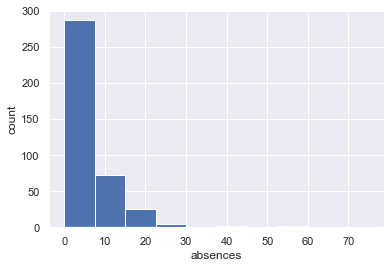

In [21]:
# histogram、データの指定
plt.hist(student_data_math['absences'])

# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドをつける
plt.grid(True)

上記のヒストグラムを観察すると、0から10までの付近にデータが集中しているのがわかります。一方、70以上など（の数字）もあり、ロングテールな分布になっています。ロングテールとは、分布の裾が緩やかに減少しているような分布です。なお、上のような分布を「右に歪みのある分布」といい、見た目とは異なり、よく間違えられるので表現に注意しましょう。

### 3.3.2 平均、中央値、最頻値
このヒストグラムは、データの全体像を見る上では欠かせないものですが、どのような時にデータが偏っているといえるのかなどの情報は読み取れず、客観性が少し乏しくなります。そのため、次の要約統計量（中央値、平均、標準偏差など）について計算することで、データの傾向を数値化し、より客観的にデータを表現することができます。

In [22]:
# 平均値
print('平均値：', student_data_math['absences'].mean())
# 中央値：中央値でデータを分けると中央値の前後でデータ数が同じになる（データの真ん中の値）、外れ値の値に影響を受けにくい
print('中央値：', student_data_math['absences'].median())
# 最頻値：最も頻度が多い値
print('最頻値：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64


なお、平均値$\overline{x}$の計算式は以下の通りです。ここで$x_i$を第$i$番目のデータ（値）とします。

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

### 3.3.3 分散と標準偏差
次に、このデータが散らばっているのか、それともまとまっている（平均付近に固まっている）のかを調べるのが分散です。分散の計算式は以下の通りです。分散は$\sigma^2$と示すことが一般的です。

\begin{eqnarray}
\sigma^2 = \frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}

該当の変数を指定した後に、`var()`で計算できます。値が小さいほど、データの散らばりが少ないことを意味しています。

In [23]:
# 分散
student_data_math['absences'].var()

64.050

標準偏差は分散の平方根で、以下のようになります。標準偏差は$\sigma$で示すことが一般的です。

\begin{eqnarray}
\sigma = \sqrt{\frac{1}{n}\sum^n_{i=1}(x_i-{\overline{x}} )^2}
\end{eqnarray}

分散では、実際のデータのばらつきがどの程度かわかりません。なぜなら、上記で提示した分散の定義式を見るとわかるように、計算式で二乗しているためです。標準偏差にすれば、単位の次元が実際のデータと同じなので、以下の結果から±8日程度のばらつきがあることが分かります。標準偏差は`std()`で計算できます。

In [24]:
# 標準偏差 σ
student_data_math['absences'].std()

8.003

なお平方根は、`np.sqrt`で平方根の計算ができるので、以下の方法で計算しても同じです。

In [25]:
np.sqrt(student_data_math['absences'].var())

8.003095687108177

### 3.3.4 要約統計量とパーセンタイル値
これまで、1つ1つの統計量を見てきましたが、Pandasで読み込んだ`DataFrame`の`describe`メソッドを実行すると、これまで求めてきた統計量を、まとめて確認できます。
`describe`メソッドでは、それぞれ順にデータ数、平均値、標準偏差、最小値、25、50、75パーセンタイル値、そして最大値を計算できます。
なお「パーセンタイル値」とは、全体を100として小さい方から数えて何番になるのかを示す数値です。たとえば、10パーセンタイルは100個のデータのうち小さいほうから数えて10番目ということになります。50パーセンタイルだと50番目で真ん中の値となり、中央値になります（下図参照）。25%タイルと75%タイルはそれぞれ第1四分位点、第3四分位点とも呼びます。

（※図は書籍を参照してください※）

In [26]:
# 要約統計量
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

#### 四方位範囲を求める

`describe`メソッドの結果は、`Series`オブジェクトに入ります。


それぞれの要素は、`describe()[インデックス番号]`として取得できます。たとえば、平均値を示す`mean`の値は、`describe()[1]`、標準偏差を示す`std`の値は`describe()[2]`です。

それぞれの要素を参照すれば、その値を使った計算ができます。たとえば、**四分位範囲**と呼ばれる75%タイルと25%タイルの差を計算したいときは、上から5番目と7番目の要素になるので、それらを使って次のように計算します。

In [27]:
# 四分位範囲(75%タイル ー 25%タイル)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

#### 全列を対象とした結果を求める

`describe`メソッドで列名や要素を指定せずに実行すると、すべての量的データの要約統計量を求めることができます。まとめて計算する場合は便利です。他、列を絞り込んで計算することもできます。

In [28]:
# 要約統計量まとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 3.3.5 箱ひげ図

さて、これまで最大値、最小値、中央値、四分位範囲などを算出してきましたが、ただ数字を見ているだけでは、比較などが難しいので、それらをグラフ化してみましょう。そのときに使うのが、次の「箱ひげ図」です。

下記の2つの例は、「1期目の成績G1」「欠席数」の箱ひげ図をそれぞれ描いたものです。特徴としてかなり異なるのがわかります。

箱ひげ図は、箱の上底が第3四分位点、下底が第1四分位点、真ん中の線が中央値です。ヒゲの上端が最大値、下端が最小値です。これで扱うデータの範囲等がわかります。

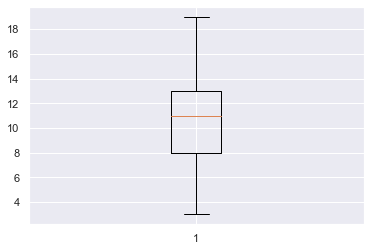

In [29]:
# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

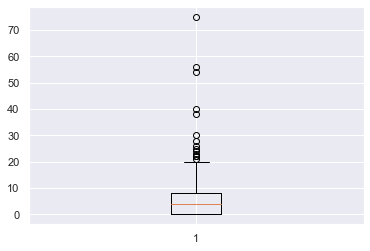

In [30]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

なお、データに外れ値がある場合、それが省かれて、箱ひげ図が表示されるので注意しましょう。先ほどの欠席数`absences`を見ると、最大値が75なのに、グラフ上には出てきていないので、気づいている方もいるかもしません。外れ値はデフォルトで指定されており、それを取り除いた場合のグラフが表示されます。

なお、外れ値は異常値ともいわれ、厳密な定義は特に決まっていません。各業界の慣習で決まることもあります。上記のグラフは外れ値を省略していますが、省かないときもあります。外れ値や異常値については、本書のレベルを超えてしまいますので、詳しくは割愛します。

他の変数でも箱ひげ図が描けるので、やってみましょう。

>**[やってみよう]**
>
>他の変数についても、箱ひげ図を表示させてみましょう。どんな図になっているでしょうか。そこから何かわかることがないか考察してみましょう。

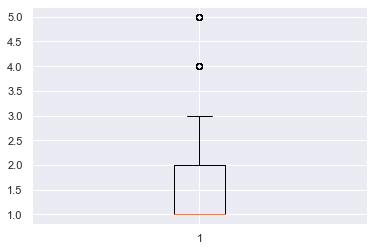

In [32]:
# 箱ひげ図：absences
plt.boxplot(student_data_math['Dalc'])
plt.grid(True)

なお、以下のように複数の箱ひげ図を同時に表示することもできます。

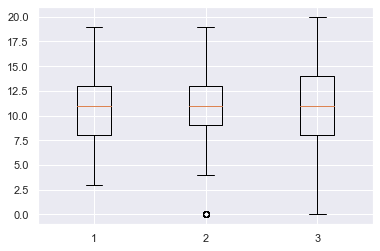

In [138]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

### 3.3.6 変動係数

次に、**変動係数**について説明していきます。

先ほど、分散や標準偏差について見てきましたが、異なる種類のデータ同士について、これらの単純比較はできません。データの大きさがそもそも異なると、大きな値をとるものの方が偏差も大きくなる傾向にあるからです。たとえば、株価（日経平均など）の標準偏差と為替（ドル円など）の標準偏差をそれぞれ計算するとしましょう。この2つの標準偏差を直接比較するのはナンセンスです。なぜなら2万円前後で動いている日経平均と100円前後で動いている為替の標準偏差とでは、スケールが異なるからです。

そこで登場するのが変動係数です。変動係数は、標準偏差を平均値で割った値です。この値を使うとスケールに依存せず、比較できるようになります。変数は$CV$で示すことが一般的です。

\begin{eqnarray}
CV = \frac{\sigma}{\overline{x}}\
\end{eqnarray}

In [139]:
# 変動係数：欠席数
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

なお、`describe()`の結果に変動係数は出力されませんが、以下のようにすれば、一気に算出できます。それぞれの要素ごとに計算されるのがPandas（もしくはNumpy）のDatarFrameの特徴です。この結果を見ると、落第数（`failures`）と欠席数（`absences`）のデータの散らばり具合が大きいことがわかります。

In [140]:
# それぞれの変動係数をまとめて計算
student_data_math.std() / student_data_math.mean() 

C:\Users\yanch\AppData\Local\Temp/ipykernel_1080/1012824433.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_data_math.std() / student_data_math.mean()


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

### 3.3.7 散布図と相関係数

さて、これまでは基本的に1変数のみに着目して、グラフや要約統計量を算出してきました。次に、変数間の関係性を見ていくために、散布図と相関係数について学びましょう。

次の散布図は、1期目の成績G1と最終成績G3の関係を示しています。

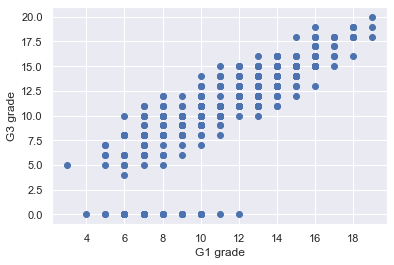

In [141]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# ラベル
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

初めから成績がいい（G1の値が大きい）人ほど後の成績もいい（G3の値が大きい）というのは当たり前の結果ですが、傾向としてはっきりと表れているのがグラフからわかります。

補足として、このグラフをよく見てみると、最終成績（G3）が0である人がいるのがわかります。一期の成績で0である人はいなかったので、これが異常値なのか、正しい値なのかはデータを見ているだけでは判断できませんが、データとしてG3の成績のスコアが0から20とあるので正しい値だと判断し、このままで扱うことにします（G3の成績のスコアは、前述のstudent_data_math.describe()の結果で「G3」の列を確認するとわかります）。

ビジネスの現場では、なぜこのような値になっているか原因を突き止めるため、このデータに詳しい人、システム関係の人たちとヒアリングしながら理解していきます。もし、欠損値等であった場合には、対処方法は色々とありますが、後の章で学ぶことにしましょう。

#### 共分散
次に、2変数の関係性について、数値化してみることを考えます。2つの変数の関係性を見るための指標として**共分散**があり、その定義は、下記の通りです。共分散が$S_{xy}$で、$x, y$という2つの変数の関係性を示しています。

\begin{eqnarray}
S_{xy} = \frac{1}{n}\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})
\end{eqnarray}

共分散は、2組の変数の偏差の積の平均値です。2組以上の変数の分散を考えるときに使われます。Numpyには共分散の行列（共分散行列）を算出する機能があり、次のように`cov`関数を使うと求められます。以下ではG1とG3の共分散を計算しています。


In [142]:
# 共分散行列
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

結果の行列の意味は、次の通りです。

- G1とG3の共分散 … 共分散行列の$(1,2)$と$(2,1)$の要素です。上の例では、12.188という値です。
- G1の分散 … 共分散行列の$(1,1)$の要素です。上の例では11.017です
- G3の分散 … 共分散行列の$(2,2)$の要素です。上の例では20.99です。

それぞれG1とG3の分散は、すでに説明したように`var`関数で計算できます。実際に求めてみると、値が合致することがわかります。

In [143]:
# 分散
print('G1の分散:',student_data_math['G1'].var())
print('G3の分散:',student_data_math['G3'].var())

G1の分散: 11.017053267364899
G3の分散: 20.989616397866737


#### 相関係数

共分散はその定義式から、各変数のスケールや単位に依存してしまいます。そのスケールの影響を受けずに、2つの変数の関係を数値化するのが相関係数です。共分散をそれぞれの変数（ここでは$ x $と$ y $）の標準偏差で割った数式が相関係数です。その定義は、以下の通りです。相関係数は$r_{xy}$で示すことが一般的です。

\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}}
\end{eqnarray}

この相関係数は、-1から1までの値を取り、1に近ければ近いほど**正の相関**があるといい、-1に近ければ近いほど**負の相関**があるといいます。0に近い場合は、**無相関**であるといいます。

Pythonでは、ピアソン関数が計算できるScipyの`pearsonr`を使って、2変数の相関係数を算出できます。たとえば、次のようにすると、G1とG3の相関係数を求められます。データ分析の現場で単に相関関数という場合には、ピアソン関数を指します。

In [144]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801467932017414, 9.001430312277865e-90)

結果は、「0.8」と相関関係がある高い数字が出ました。なお、計算結果の2つ目の値はp値という値で、詳しくは「4.7.1 検定」で解説しています。

この数字については、厳密に高い低いというのはなく、またこれが高いからといって**因果関係**があるとは言えないので注意しましょう（なお、本書では詳しく扱いませんが、因果関係を把握したい場合には、**実験計画法**と呼ばれるアプローチなどを使っていきます。具体的には、あるマーケティング施策で、ある広告を見て効果があったのかなかったのか、因果関係を知りたい場合に、広告を見せる処置群と何も広告を見せないコントロール群に分けて、その比率等を計算していきます）。

次の計算は、相関行列を算出するものです。それぞれの変数について、すべての組み合わせで相関係数を算出しています。先ほどのG1とG3の相関係数は0.801ですし、自分自身の相関係数は1になるのが自明ですから、この結果になるのは明らかです。

In [145]:
# 相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']]) 

array([[1.   , 0.801],
       [0.801, 1.   ]])

### 3.3.8 すべての変数のヒストグラムゃ散布図を描く

最後に、各変数のヒストグラムをすべて表示したり、散布図を描く方法を紹介します。

このような処理には、統計的データ分析と可視化に関する機能が豊富に用意されているSeabornというライブラリを利用すると便利です。`seaborn`パッケージの`pairplot`を使えば、さまざまな変数の関係性を一度に確認できるので、とても便利です。ただし、変数が多いと計算に時間がかかり、若干見にくくなります。その場合は、「2.4.5　データの抽出」で説明した方法で該当データを絞り込むなどするとよいでしょう。

サンプルとして、先ほどのデータにおいて、アルコールの摂取量と成績のスコアに関係があるのか、見てみることにします。

Dalcは平日のアルコール摂取量、Walcは週末のアルコール摂取量です。それらと1期目の成績（G1）、最終成績（G3）の関係を見ています。アルコールを飲むからといって、成績が悪いと言えるのでしょうか。それとも関係ないのでしょうか。


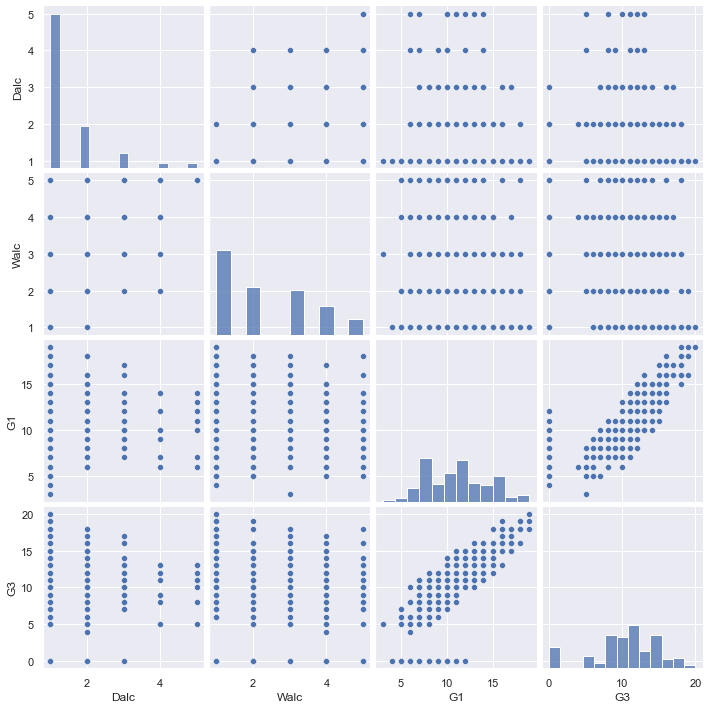

In [146]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [147]:
# 例：週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

グラフから、平日にアルコールを頻繁に飲んでいる人（4や5の人）はG3で好成績を取っている人はいないようですが、極端に悪い成績を取っている人もいないようです。また、週末にアルコールを飲まない人の方が1期目の成績は少し良さそうに見えますが、こう結論付けて良いのでしょうか。これらのグラフや数値だけでは、なかなか判断が難しいですが、次の統計の章や機械学習の章でもアプローチしてみます。



以上で、記述統計に関する基礎的事項は終わります。

とても基本的ですが、ここで説明した内容は、どのようなデータ分析をする場合でも、データの全体像をつかむために必要な作業です。

本書では、機械学習のライブラリ等を使って、簡単に機械学習の計算ができることを紹介していきますが、その一方で、今までやってきた基礎的な統計量を見ていくことも大事であることは強調しておきます。簡単な散布図を書くだけで重要な傾向がわかることもあります。また、ここまでの内容はおそらく数学的なバックグラウンドがない人でもついていきやすく、説明がしやすいはずです。

もちろん、これだけで終わるならば機械学習は必要なくなりますが、機械学習を適用する前に、データと対話をして、不明事項や異常値の確認をするなど、関係者と密に連携をとっておけば、よりよいデータ分析ができます。

>**[ポイント]**

>データ分析をするときにはまず基本統計量やヒストグラム、散布図等を見て、データの全体像を掴もう。

#### <練習問題 3-1>

本章でダウンロードしたポルトガル語の成績データであるstudet-por.csvを読み込んで、要約統計量を表示してください。

In [148]:
student_por = pd.read_csv('student-por.csv',sep=';')

In [149]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [150]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [151]:
student_por['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [152]:
student_por['absences'].head()

0    4
1    2
2    6
3    0
4    0
Name: absences, dtype: int64

In [153]:
student_por['absences'].head()

0    4
1    2
2    6
3    0
4    0
Name: absences, dtype: int64

In [154]:
student_por.groupby('sex')['age'].mean()

sex
F    16.788512
M    16.680451
Name: age, dtype: float64

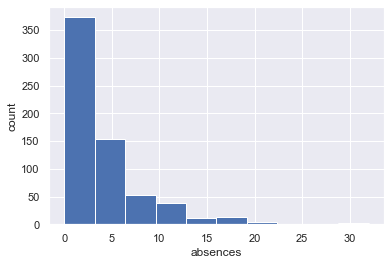

In [155]:
plt.hist(student_por['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [156]:
print('平均值：', student_por['absences'].mean())
print('中央值：', student_por['absences'].median())
print('最頻值：', student_por['absences'].mode())

平均值： 3.6594761171032357
中央值： 2.0
最頻值： 0    0
dtype: int64


In [157]:
student_por['absences'].var()

21.537

In [158]:
student_por['absences'].std()

4.641

In [159]:
np.sqrt(student_por['absences'].var())

4.640758808397126

In [160]:
student_por['absences'].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [161]:
student_por['absences'].describe()[6] - student_por['absences'].describe()[4]

6.0

In [162]:
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


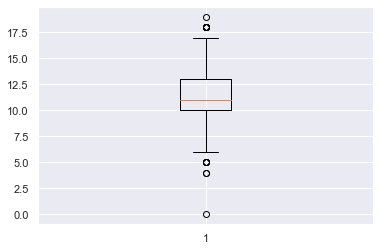

In [163]:
plt.boxplot(student_por['G1'])
plt.grid(True)

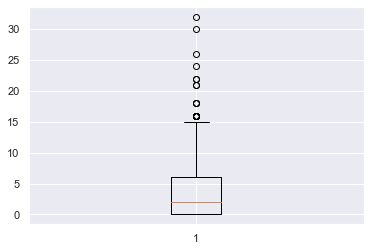

In [164]:
plt.boxplot(student_por['absences'])
plt.grid(True)

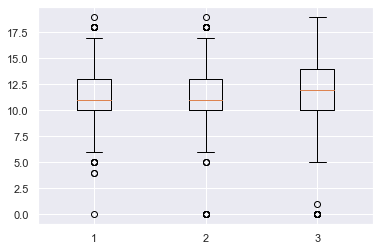

In [165]:
plt.boxplot([student_por['G1'],student_por['G2'],student_por['G3']])
plt.grid(True)

In [166]:
student_por['absences'].std() / student_por['absences'].mean()

1.268

In [167]:
student_por.std() / student_por.mean()

C:\Users\yanch\AppData\Local\Temp/ipykernel_1080/1417665281.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_por.std() / student_por.mean()


age           0.072750
Medu          0.451179
Fedu          0.476857
traveltime    0.477289
studytime     0.429650
failures      2.673678
famrel        0.243144
freetime      0.330503
goout         0.369169
Dalc          0.615608
Walc          0.563218
health        0.408986
absences      1.268148
G1            0.240832
G2            0.251825
G3            0.271347
dtype: float64

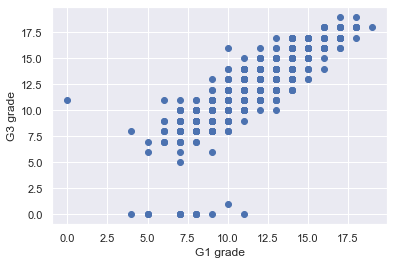

In [168]:
plt.plot(student_por['G1'],student_por['G3'],'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [169]:
np.cov(student_por['G1'],student_por['G3'])

array([[ 7.536,  7.329],
       [ 7.329, 10.437]])

In [170]:
print('G1的分散:',student_por['G1'].var())
print('G3的分散:',student_por['G3'].var())

G1的分散: 7.536480625463658
G3的分散: 10.437139759173656


In [171]:
sp.stats.pearsonr(student_por['G1'],student_por['G3'])

(0.8263871247890473, 1.617571007349675e-163)

In [172]:
np.corrcoef([student_por['G1'],student_por['G3']])

array([[1.   , 0.826],
       [0.826, 1.   ]])

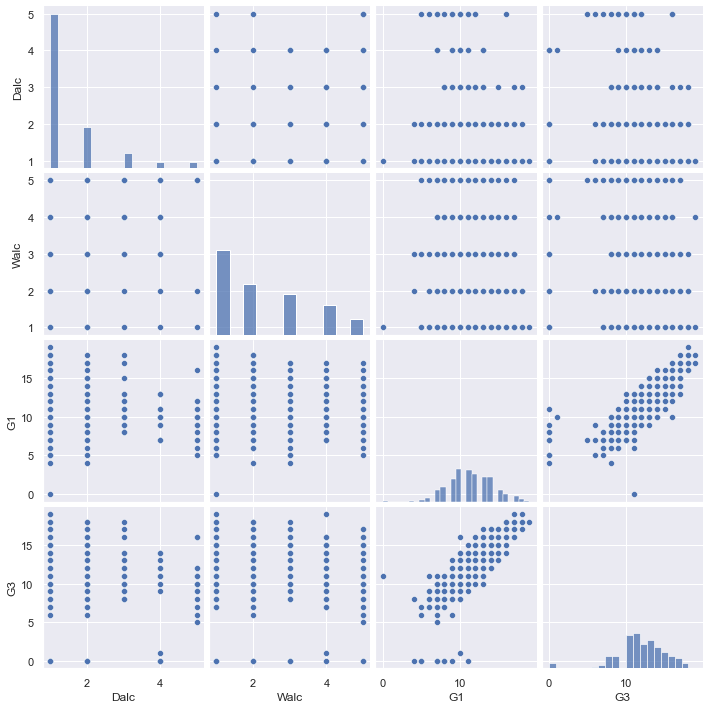

In [173]:
sns.pairplot(student_por[['Dalc','Walc','G1','G3']])
plt.grid(True)

In [174]:
student_por.groupby('Walc')['G1'].mean()

Walc
1    11.688259
2    11.746667
3    11.308333
4    10.655172
5    10.333333
Name: G1, dtype: float64

#### <練習問題 3-2>

以下の変数をキーとして、数学のデータとポルトガル語のデータをマージしてください。マージするときは、両方にデータが含まれている（欠けていない）データを対象としてください（内部結合と言います）。

そして、要約統計量など計算してください。

なお、以下以外の変数名は、それぞれのデータで同名の変数名があり重複するので、`suffixes=('_math', '_por')`のパラメータを追加して、どちらからのデータかわかるようにしてください。

`['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']`

#### <練習問題 3-3>

<練習問題 3-3>でマージしたデータについて、`Medu`、`Fedu`、`G3_math`などの変数をいくつかピックアップして、散布図とヒストグラムを作成してみましょう。どういった傾向がありますか。また、数学データのみの結果と違いはありますか。考察してみましょう。

***

## 3.4 単回帰分析
キーワード：Scikit-learn、目的変数、説明変数、単回帰分析、最小二乗法、決定係数

記述統計の次は、回帰分析の基礎を学びましょう。
回帰分析とは、数値を予測する分析です。機械学習では、データの予測をしますが、その基礎となるのが、ここで説明する単回帰分析です。

先ほど、学生のデータについて、一期目の数学の成績と最終期の数学の成績をグラフ化（散布図）してみました。この散布図からG1とG3には関係がありそうだというのはわかります。

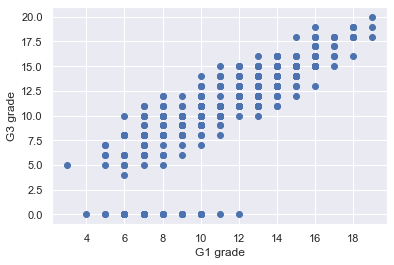

In [175]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

回帰問題では、与えられたデータから関係式を仮定して、データに最も当てはまる係数を求めていきます。具体的には、あらかじめ分かっているG1の成績をもとに、G3の成績を予測します。つまり、目的となる変数G3（**目的変数**といいます）があり、それを説明する変数G1（**説明変数**といいます）を使って予測します。これは後ほど機械学習の章で学ぶ「教師あり学習」の1つでもあり、学習時のデータに正解を1つ1つ与えて、その関係性を計算する基礎となるものです。

回帰分析の手法は、アウトプット（目的変数）とインプット（説明変数）の関係において、インプットが1変数のものと、2変数以上あるもので、大きく分けられます。前者を単回帰分析、後者を重回帰分析と言います。この節では単純な単回帰分析について説明することにし、重回帰分析については後の機械学習の章で改めて説明します。

なお、この節で学ぶ内容を厳密に理解するためには、次の章で学ぶ統計や推定、検定の知識等が必要です。実際、多くの統計の教科書では、これらの知識を学んだ後で回帰分析について解説しています。

しかしPythonを使って回帰分析する場合、そうした知識がなくてもScikit-learnという抽象度の高いライブラリを利用することで計算できるため、ここでは、先に実際の計算の方法を説明することにします。この章の内容は、もう少し先に進んでから、後で振り返って復習すると、より深く理解できるはずです。

### 3.4.1 線形単回帰分析

ここでは単回帰分析のうちでも、アウトプットとインプットが線形の関係に成り立つ（ $ y = ax + b $ ）ことを前提とした線形単回帰という手法で回帰問題を解く方法を説明します。
線形単回帰分析は、Scikit-learnというライブラリに用意されている`sklearn.linear_model`を使うと簡単に計算できます。Scikit-learnは機械学習のためのパッケージです。このパッケージは、後の機械学習の章で、さらにさまざまな計算をする場面でも利用します。まず、以下のように`linear_model`をインポートした後、インスタンスを作ります。

In [176]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

以下では、説明変数（$X$とします）と目的変数（$Y$とします）データをセットして、線形回帰する`fit`という機能を使って、予測モデルを計算します。

この場合の`fit`関数は、**最小二乗法**という手法で回帰係数$a$と切片$b$を計算しています。この方法は、実際の目的変数のデータと予測したデータの差の二乗和をとり、それが最小になる時の係数と切片を求めるものです。式で表現すると、$y$を実測値、$ f(x) = ax + b $を予測値として、以下の式を最小にするように計算しています（計算方法としては、この式を微分していくのですが、`fit`関数を実行すれば、その計算をしてくれるので詳細は割愛します）。

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

In [177]:
# 説明変数に "一期目の数学の成績" を利用
# locはデータフレームから、行と列を指定して取り出す。loc[:, ['G1']]は、G1列のすべての列を取り出すことをしている
# valuesに直しているので、注意
X = student_data_math.loc[:, ['G1']].values

# 目的変数に "最終の数学の成績" を利用
Y = student_data_math['G3'].values
 
# 予測モデルを計算、ここでa,bを算出
reg.fit(X, Y)
 
# 回帰係数
print('回帰係数:', reg.coef_)
 
# 切片 
print('切片:', reg.intercept_)

回帰係数: [1.106]
切片: -1.6528038288004616


上記の回帰係数が線形の回帰式 $ y = ax + b $ における$ a $に相当し、切片に相当するのが$b$です。先ほどの散布図と重ねて、予測した線形回帰式を描いてみましょう。$Y$、つまり予測したい最終の数学の成績G3は、`predict`を使って、括弧の中に説明変数を入れることで計算できます。

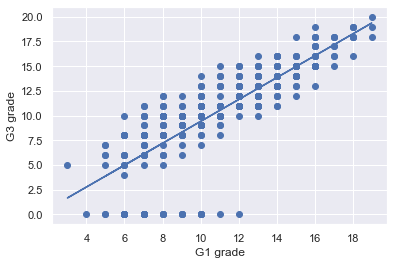

In [178]:
# 先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X, reg.predict(X))
plt.grid(True)

### 3.4.2 決定係数

上記のグラフを見ると予測式は実測値をうまく予測しているようにも見えますが、これが客観的にどうなのかというのは判断がつきません。そこで、それを数値化したものが、**決定係数**です。決定係数は寄与率とも呼ばれます。定義は以下のとおりです。決定係数は$R^2$と示すことが一般的です。

\begin{eqnarray}
R^2 = 1 - \frac{\sum_{i = 1}^n(y_i - f(x_i))^2}{\sum_{i = 1}^{n}(y_i - \bar{y})^2}
\end{eqnarray}

$R^2$は最大で1の値を取り、1に近ければ近いほど良いモデルになります。$\bar{y}$は目的変数の平均値です。説明変数を使わずに常に$\bar{y}$（定数）で予測した場合と二乗誤差が等しい場合に $R^2=0$ となります。Pythonを使って決定係数を求めるには、`score`を使って以下のようにします。

In [179]:
# 決定係数、寄与率とも呼ばれる
print('決定係数:', reg.score(X, Y))

決定係数: 0.64235084605227


なお、この決定係数の数値がどこまで高ければ良いのかという問題はあります。教科書的なデータや問題では0.9以上の場合が多いですが、実務ではなかなかそこまで出せることはなく、それをどう判断するかはケースバイケースです。ちなみに、上の0.64は高くはありませんが、現場レベルで見ると、使えないレベルでもありません。

以上で、単回帰分析と本章の説明は終わりになります。お疲れ様でした。残りは、練習問題と総合演習問題になります。ぜひチャレンジしてください。

#### <練習問題 3-4>


ポルトガル語の成績データであるstudent-por.csvのデータを使って、`G3`を目的変数、`G1`を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。

#### <練習問題 3-5>

練習問題3-4のデータの実際の散布図と、回帰直線を合わせてグラフ化してください。

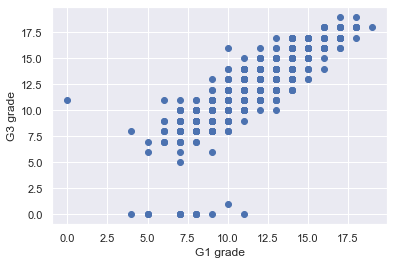

In [183]:
plt.plot(student_por['G1'],student_por['G3'],'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

In [181]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [185]:
X=student_por.loc[:, ['G1']].values
Y=student_por['G3'].values
reg.fit(X,Y)
print('回歸係數:',reg.coef_)
print('切片:',reg.intercept_)

回歸係數: [0.973]
切片: 0.8203984121064565


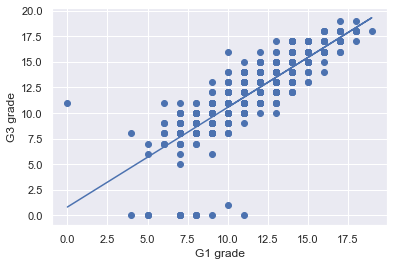

In [186]:
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X,reg.predict(X))
plt.grid(True)

In [187]:
print('決定係數:',reg.score(X,Y))

決定係數: 0.6829156800171083


#### <練習問題 3-6>

student-por.csvのデータを使って、`G3`を目的変数、`absences`（欠席数）を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。また、散布図と回帰直線をグラフ化してみましょう。そして、この結果を見て、考察してみましょう。

***

## 3.5 総合問題

### ■総合問題3-1 統計の基礎と可視化

以下のサイトにあるデータ（ワインの品質）を読み込み、以下の問いに答えてください。

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

（1）要約統計量（平均、最大値、最小値、標準偏差など）を算出してください。

（2）それぞれの変数の分布と、それぞれの変数の関係性（2変数間のみ）がわかるように、グラフ化してみましょう。何かわかる傾向はありますか。

### ■総合問題3-2 ローレンツ曲線とジニ係数

この章で利用したサンプルデータstudent_data_mathのデータを使って、以下の問いに答えてください。ここで扱うローレンツ曲線やジニ係数は、貧富の格差（地域別、国別など）を見るための指標として使われています（なお、本問題は少し難易度が高いため、参考程度に見てください。詳細は、以前に紹介した統計学入門などの文献を参照するか、ネットで検索してください）。

（1）一期目の数学データについて、男女別に昇順に並び替えをしてください。そして、横軸に人数の累積比率、縦軸に一期目の値の累積比率をとってください。この曲線をローレンツ曲線といいます。このローレンツ曲線を男女別に一期目の数学成績でグラフ化してください。

（2）不平等の程度を数値で表したものをジニ係数といいます。この値は、ローレンツ曲線と45度線で囲まれた部分の面積の2倍で定義されて、0から1の値を取ります。値が大きければ大きいほど、不平等の度合いが大きくなります。なお以下のようにジニ係数は定義できます。$\overline{x}$は平均値です。

\begin{eqnarray}
GI=\sum_{i}\sum_{j}\left| \frac{x_i-x_j}{2n^2 \overline{x}}\right|
\end{eqnarray}

これを利用して、男女の一期目の成績について、ジニ係数をそれぞれ求めてください。